SURPEVISED LEARNING

In [1]:
import numpy as np
import matplotlib.pyplot as plt

linear regression with SKLearn

In [2]:
np.random.seed(0)
m = 100
X = np.linspace(0, 10, m).reshape(m, 1)
y = X + np.random.randn(m, 1)

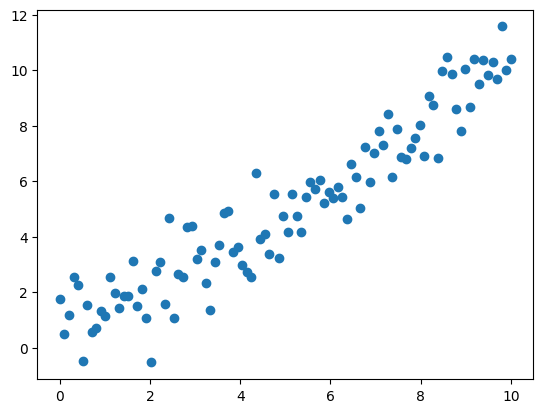

In [3]:
plt.scatter(X, y)

In [4]:
from sklearn.linear_model import LinearRegression

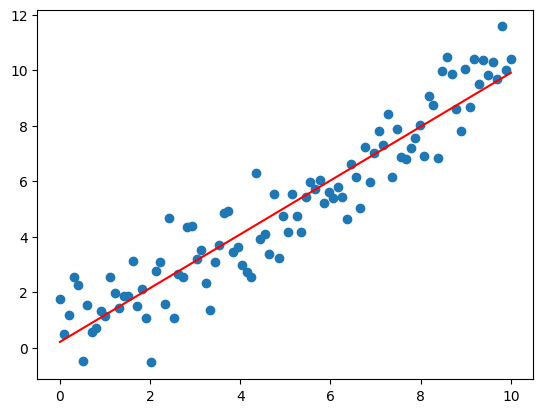

In [6]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)


predictions = model.predict(X)


plt.scatter(X, y)
plt.plot(X, predictions, c='r')

Cas d'un dataset non lineaire

In [7]:
np.random.seed(0)
m =100
X = np.linspace(0, 10, m).reshape(m, 1)
y = X**2 + np.random.randn(m, 1)

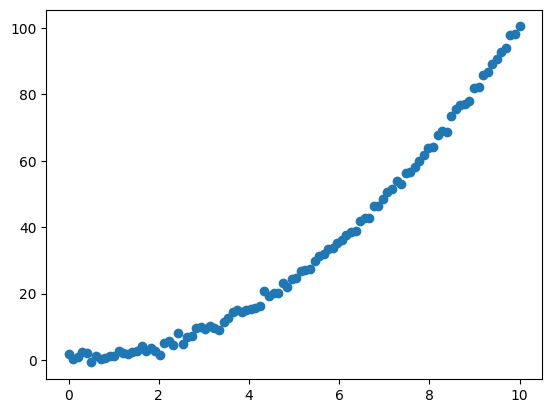

In [8]:
plt.scatter(X, y)

In [9]:
from sklearn.linear_model import LinearRegression

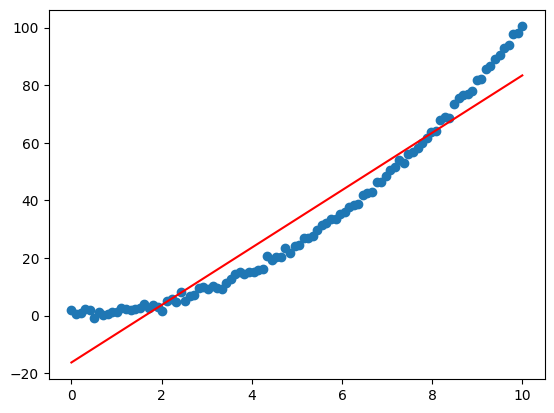

In [10]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)


predictions = model.predict(X)


plt.scatter(X, y)
plt.plot(X, predictions, c='r')

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


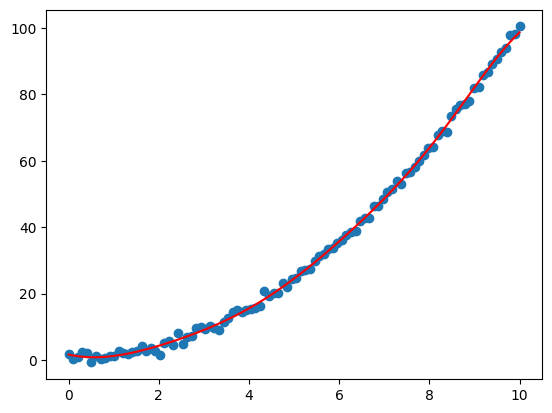

In [14]:
model = SVR(C=100)
model.fit(X, y)
model.score(X, y)


predictions = model.predict(X)


plt.scatter(X, y)
plt.plot(X, predictions, c='r')

SKLearn Classification

Classification : survivant du titanic

In [44]:
import pandas as pd
import seaborn as sns

In [45]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [49]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'] = titanic['sex'].replace(['male', 'female'], [0, 1])
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
model = KNeighborsClassifier()

In [55]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [56]:
model.fit(X, y)
model.score(X,y)

0.8305322128851541

In [57]:
model.predict(X)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,

In [61]:
def survie(model, pclass=1, sex=0, age=28):
    x = np.array([pclass, sex, age]).reshape(1, 3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [62]:
survie(model)

[0]
[[0.6 0.4]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Trainset et testset avec train_test_split

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


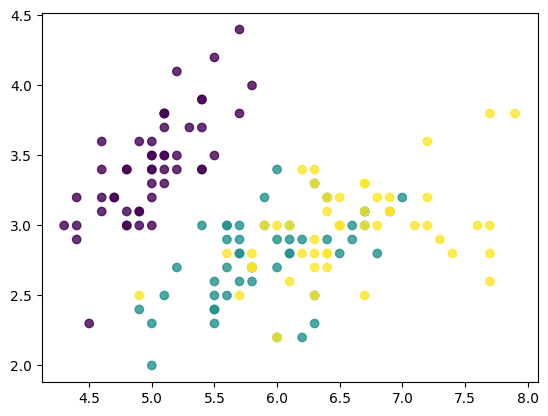

In [65]:
iris = load_iris()


X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


Text(0.5, 1.0, 'Test set')

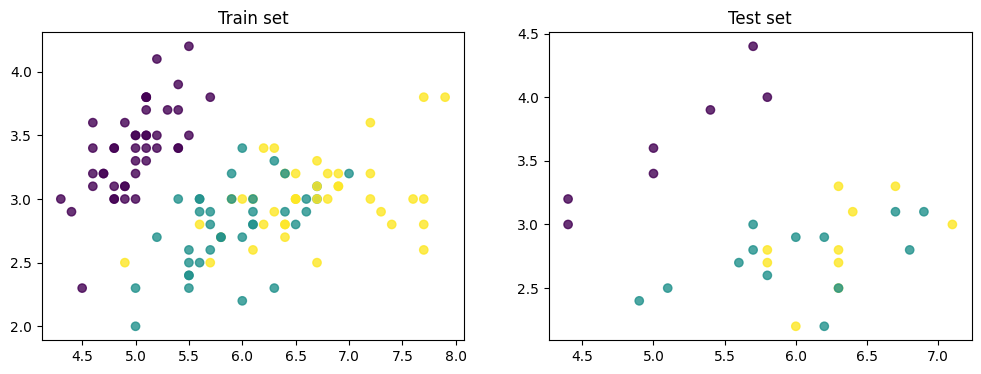

In [69]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title('Test set')

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 1.0
Test score: 0.9333333333333333


Validation set Ameliorer le modele

Cross - validation : consiste a entrainer et a valider notre modele sur plusieurs decoupes du train set

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9416666666666668

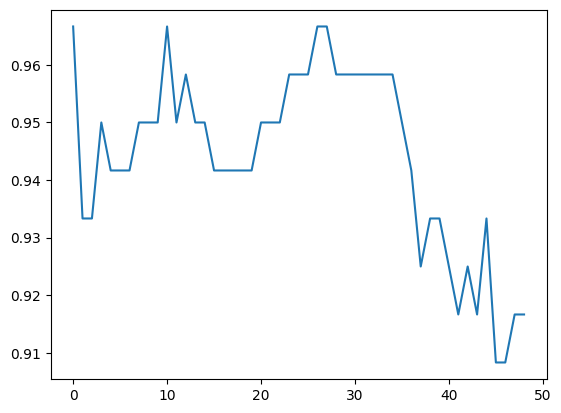

In [82]:
val_score = []
for k in range(1, 50):
  score = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5, scoring='accuracy').mean()
  val_score.append(score)

plt.plot(val_score)

Validation curve

In [83]:
from sklearn.model_selection import validation_curve

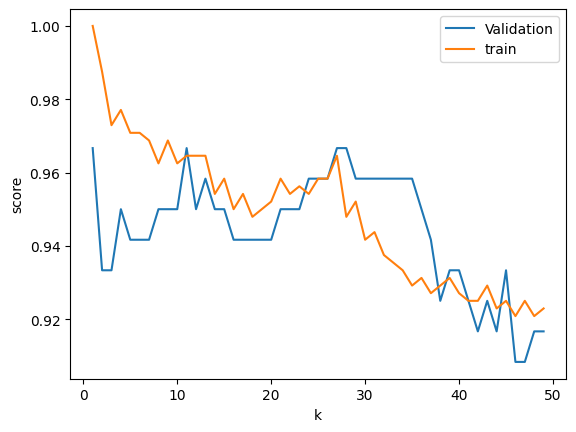

In [86]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1), label = 'Validation')
plt.plot(k, train_score.mean(axis=1), label = 'train')
plt.xlabel('k')
plt.ylabel('score')
plt.legend()

GridsearchCv

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [89]:
grid.best_score_

0.9666666666666668

In [90]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 11}

In [91]:
model = grid.best_estimator_
model.score(X_test, y_test)

1.0

In [92]:
from sklearn.metrics import confusion_matrix

In [94]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 7,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 10]])

Learning curve